# Seminar 1. Introduction

<font color='red'>**Last updated: 22.01.2024**</font>

# 0. Basic instruments






The programming exercises will be conducted using **Jupyter Notebooks** with **Python**.

All exercises are designed to run smoothly on [Google Colab](https://colab.research.google.com/). This cloud-based environment requires only a Google account and provides free access to powerful computing resources, including GPUs (around 12h per day).

Alternatives:

1.   Another popular platform is [Kaggle Notebooks](https://www.kaggle.com/code).
2.   If you are working offline [Anaconda](https://anaconda.org/) may be an option.

Essential Colab Commands:

*  **Run Cell**: Select the cell and press `Ctrl+Enter` to execute the code within.
*  **Interrupt Execution**: `Menu -> Runtime -> Interrupt execution` or the Stop button.
*  **Restart Kernel** (you will lose all variables): `Menu -> Runtime -> Restart session`.

# 1. Data in Mathematics

Let's explore how we represent mathematical data for AI.



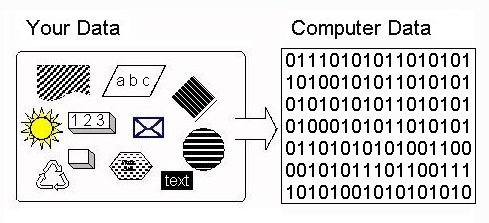

At the lowest level, computers operate on numerical data. This data can be organized into various structures:

1. Scalars (single numbers)
2. Vectors (1-dimensional arrays)
3. Matrices (2-dimensional arrays)
4. Tensors (n-dimensional arrays, generalizing scalars, vectors, and matrices)


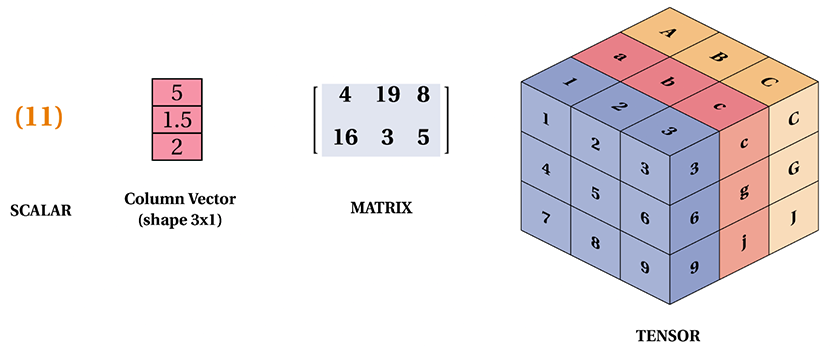

Let's explore how to translate mathematical structures into a computer-understandable format.

We will explore the following core questions:

1. **Computer representation** of Mathematical structures.
2. **Generation** of Mathematical datasets.

The 2nd question will be briefly introduced here, with a more in-depth discussion reserved for future seminars.


## 1.1 Numbers, Matrices and Logical operations


Computers are inherently capable of efficiently representing and manipulating **numbers**, **matrices** and **logical expressions**.

1. [Python](https://www.python.org/doc/) itself provides some basic mathematical [opertations](https://docs.python.org/3/library/math.html) and  [data structures](https://docs.python.org/3/tutorial/datastructures.html) inlcuding

*   Boolean and Numeric types: *bool, int, float, complex*
*   Boolean operations: *and, or, not*.
*   *Lists* [a, b, c] and *tuples* (d, e, f),
*   *Sets* {g, h, k} and *dictionaries* {l:m, p:q}.

2.   [Numpy](https://numpy.org/)  Essential library for almost any numerical task. It provides efficient multi-dimensional arrays (ndarrays) and functions for linear algebra, random number generation, and more.


In [ ]:
import numpy as np

# Create a NumPy array
arr = np.array([1, 2, 3, 4, 5, 6])

# Basic array operations
print("Array:", arr)
print("Shape:", arr.shape)
print("Data type:", arr.dtype)
print("Sum:", np.sum(arr))

# Array indexing and slicing
print("Element at index 2:", arr[2])
print("Slice from index 1 to 3:", arr[1:4])

# Reshape the array
matrix_a = arr.reshape((3,2))
print("Reshaped array:\n", matrix_a)

#Generate random numbers
matrix_b = np.random.randint(0, 5, (2, 3))
print("Matrix B:\n", matrix_b)

# Matrix operations (example with 2D arrays)
print("Matrix product:\n", np.dot(matrix_a, matrix_b)) # or matrix_a @ matrix_b

Array: [1 2 3 4 5 6]
Shape: (6,)
Data type: int64
Sum: 21
Element at index 2: 3
Slice from index 1 to 3: [2 3 4]
Reshaped array:
 [[1 2]
 [3 4]
 [5 6]]
Matrix B:
 [[2 0 2]
 [4 2 0]]
Matrix product:
 [[10  4  2]
 [22  8  6]
 [34 12 10]]


### **Pitfall**: Shallow Copies in Python Lists

In [ ]:
from copy import deepcopy

lst1 = [1, 2]
# shallow copy
lst2 = lst1
lst3 = deepcopy(lst1)

lst1[1] = 0
print("Shallow copy:\n", lst2)
print("Deep copy:\n", lst3)

Shallow copy:
 [1, 0]
Deep copy:
 [1, 2]


### **Pitfall**: Using mutable default arguments

In [ ]:
def my_function(numbers=[]):
  numbers.append(1)
  return sum(numbers)

'''
How to fix:
def my_function(numbers=None):
  if numbers is None:
    numbers = []
    ...
'''

result1 = my_function()  # Output: 1 (using the default list)
result2 = my_function()  # Output: 2 (the default list now contains [1])
result3 = my_function([2, 3])  # Output: 6 (uses the provided list, not the default)
result4 = my_function()
print(result1, result2, result3, result4)

1 2 6 3


In Python, integers have essentially no upper limit due to the use of arbitrary-precision arithmetic. However, *integers in NumPy arrays are limited* (!) by the data type used to represent them (e.g., 32-bit or 64-bit integers).

In [ ]:
# Create two large NumPy arrays with a specific data type
a,b = np.array([2**53], dtype=np.uint64), np.array([2**53], dtype=np.uint64)
c, d = 2**53, 2**53

# Multiply the arrays
print(a * b)
print(c*d)

[0]
81129638414606681695789005144064


## 1.1.1 Sequence generation

How can we effectively represent infinite sequences of numbers in Python? One approach is to utilize generators or iterators.  We will explore an alternative method below.

*   **Generators** are functions that use the yield keyword to produce a sequence of values on-the-fly. This avoids creating and storing the entire infinite sequence in memory.


In [ ]:
def fibonacci():
    """Generates the Fibonacci sequence."""
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b

for num in fibonacci():
    print(num)
    if num > 20:
      break

0
1
1
2
3
5
8
13
21



*   **Iterators** are objects that implement the __iter__ and __next__ methods. They allow you to iterate over a sequence of values one at a time.


In [ ]:
class EvenNumbers:
    def __init__(self):
        self.current = 0

    def __iter__(self):
        return self

    def __next__(self):
        num = self.current
        self.current += 2
        return num

even_numbers = EvenNumbers()
for num in even_numbers:
    print(num)
    if num > 15:
      break

0
2
4
6
8
10
12
14
16


Alternatively, sequences can be encoded by representing them as other mathematical objects. For example, a Taylor series can be  represented by its corresponding generating function: $$e^x = \sum _{n=0}^{\infty }{\frac {x^{n}}{n!}}={\frac {x^{0}}{0!}}+{\frac {x^{1}}{1!}}+{\frac {x^{2}}{2!}}+{\frac {x^{3}}{3!}}+{\frac {x^{4}}{4!}}+{\frac {x^{5}}{5!}}+\cdots.$$

If we need some number sequences we can generate them directly or take them from [https://oeis.org/](https://oeis.org/)

## 1.2. Statistical functions and distributions.

Statistical data can be easily represented and processed in Python.

3. [SciPy](https://scipy.org/) offers advanced scientific computing tools, including

*   **scipy.linalg**: Linear algebra (more advanced than numpy.linalg).
*   **scipy.sparse**: Working with sparse matrices.
*   **scipy.stats**: Statistical functions and distributions.

4. [Matplotlib](https://matplotlib.org/) The go-to library for visualizing mathematical data.


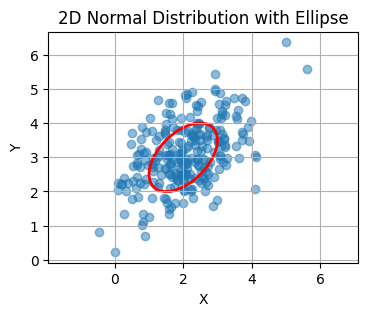

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
# Allows you to draw graphs and images directly on your laptop, rather than in a separate window.
%matplotlib inline

# Define the mean and covariance matrix of the 2D normal distribution
mean = [2, 3]
covariance = [[1, 0.5], [0.5, 1]]

# Generate random points from the normal distribution
points = multivariate_normal.rvs(mean=mean, cov=covariance, size=250)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance)

# Plot the points
plt.figure(figsize=(4, 3))
plt.scatter(points[:, 0], points[:, 1], alpha=0.5)

# Create and plot the ellipse for 1 std
angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1])) # angle of rotation
ellipse = Ellipse(xy=mean, width=np.sqrt(eigenvalues[0]) * 2 ,
                  height=np.sqrt(eigenvalues[1]) * 2, angle=angle,
                  edgecolor='red', fc='None', lw=2)
plt.gca().add_patch(ellipse)

# Set plot properties
plt.title('2D Normal Distribution with Ellipse')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')  # Ensure the x and y axes have the same scale

# Show the plot
plt.show()

## 1.3. Graphs


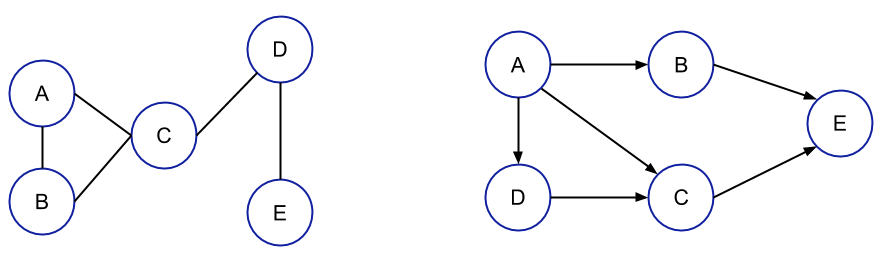


Another class of objects well-suited for computer representation are (finite) **graphs**. These can be effectively represented using either Adjacency Matrices or Adjacency Lists.

In [ ]:
# adjacency list for the graph above
adjacency_list = {
    0: [1, 2],
    1: [0, 2],
    2: [0, 1, 3, 4],
    3: [2],
    4: [3]
}

def adjacency_list_to_matrix(adjacency_list):
    num_nodes = len(adjacency_list)
    adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            adjacency_matrix[node][neighbor] = 1
    return adjacency_matrix

print(adjacency_list_to_matrix(adjacency_list))

[[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [0 0 0 1 0]]


### 1.3.1 Graph generators

There are some graph datasets for ML benchmarks [https://huggingface.co/graphs-datasets](https://huggingface.co/graphs-datasets)

We can also generate graphs using Python libraries like [networkx](https://networkx.org/).  


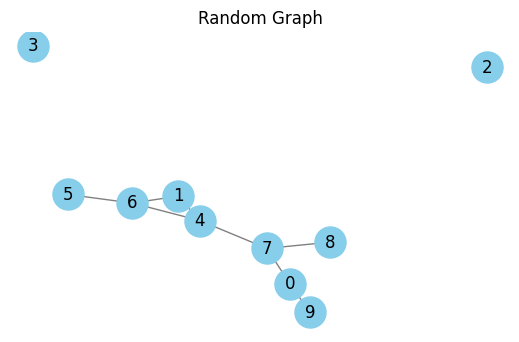

In [ ]:
import networkx as nx

# Generate a random graph (you can customize the parameters)
num_nodes = 10
probability_edge = 0.3
graph = nx.erdos_renyi_graph(num_nodes, probability_edge)

# Draw the graph
plt.figure(figsize=(5, 3))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title("Random Graph")
plt.show()

For certain applications, we require graphs with specific properties. In such cases, we can try using [Wolfram Graph Database](https://reference.wolfram.com/language/ref/GraphData.html.en) or develop custom generation methods.


*   <font color='blue'>**Question:**</font> What specific types of graphs might we need to generate?



## 1.4 Geometric figures (Polygons, Polytopes, Surfaces and Manifolds)

The choice of representation for polygons and polytopes depends on the specific application. One approach is to explicitly define their vertices by specifying the coordinates of each point.

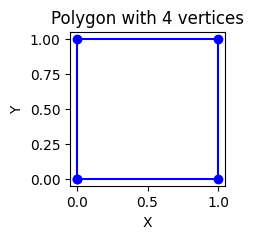

In [ ]:
# Define the vertices of the polygon
vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

# Plot the polygon
plt.figure(figsize=(2, 2))
x_coordinates = np.append(vertices[:, 0], vertices[0, 0])  # Close the polygon
y_coordinates = np.append(vertices[:, 1], vertices[0, 1])
plt.plot(x_coordinates, y_coordinates, 'b-o')

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polygon with 4 vertices')

# Display the plot
plt.show()

There are some databases for polytopes and other discrete objects:

*   [Kreuzer-Skarke Database](http://hep.itp.tuwien.ac.at/%7Ekreuzer/CY/CYhome.html) contains the database of reflexive polytopes
(lattice polytopes with a single interior point such that all facets are distance 1 therefrom). They are closely related to Calabi-Yau manifolds. The polytopes are represented by the vector coordinates of the vertices.
*   [https://polydb.org/](https://polydb.org/). A general database for discrete geometric objects.
*   [https://github.com/gabrieleballetti/small-lattice-polytopes](https://github.com/gabrieleballetti/small-lattice-polytopes) Dataset of "small" lattice polytopes.




### 1.4.1 2D-Surfaces

For a given surface, we can employ triangulation or spline approximation techniques to represent it.

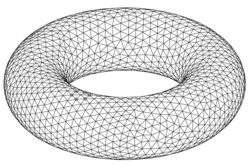

 Alternatively, for certain analyses, only some geometric or topological invariants  may be required. Consider the [classification of closed oriented surfaces](https://en.wikipedia.org/wiki/Surface_(topology)#Closed_surfaces).

*   **Theorem** Every closed oriented surface is either a sphere $S^2$ or
a connected sum of $g$ tori $M^2_g \approx \#_g \mathbb{T}^2$ for some $g \geq 1$.

The number $g$ is called a **genus** of the surface (formally, $S^2$ is a  genus $0$ surface).


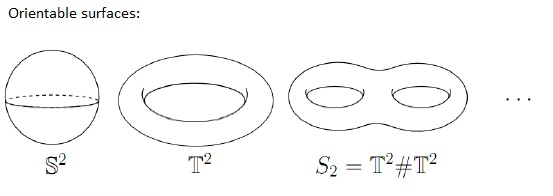

Every orientable two-dimensional surface can be represented as a polygon with identified edges. These polygonal presentations can be reduced to one of the following standard forms:

*   Sphere: $aa^{-1}$.
*   Connected sum of $g$ tori: $a_1 b_1 a_1^{-1}b_1^{-1} \dots a_g b_g a_g^{-1} b_g^{-1}$.



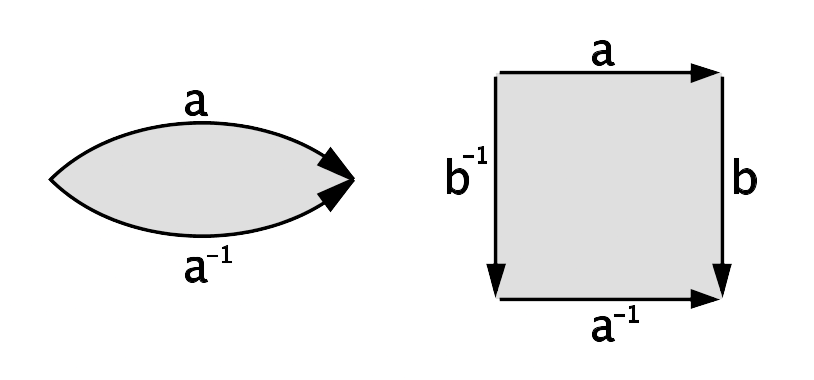

In [ ]:
import pandas as pd

platonic_solids = [
    {"name": "Sphere", "genus": 0, "fundamental polygon": ['a', '-a']},
    {"name": "Torus", "genus": 1, "fundamental polygon": ['a1', 'b1', '-a1', '-b1']},
    {"name": "M^2_2", "genus": 2, "fundamental polygon": ['a1', 'b1', '-a1', '-b1',
                                                          'a2', 'b2', '-a2', '-b2']},
]

df = pd.DataFrame(platonic_solids)
df

,name,genus,fundamental polygon
0,Sphere,0,"[a, -a]"
1,Torus,1,"[a1, -a1, b1, -b1]"
2,M^2_2,2,"[a1, -a1, b1, -b1, a2, -a2, b2, -b2]"


Here we used [Pandas](https://pandas.pydata.org/). It is essential for working with datasets in ML. Provides data structures like DataFrames (tables) and Series (1D arrays with labels). Use NumPy for numerical arrays; use Pandas for structured data like tables with mixed types.

| Feature             | NumPy                                  | Pandas                                     |
|----------------------|-----------------------------------------|---------------------------------------------|
| **Primary Data Structure** | N-dimensional array (`ndarray`)        | Series (1D) and DataFrame (2D tabular data) |
| **Data Type**       | Homogeneous (all elements of the same type) | Heterogeneous (columns can have different types) |
| **Focus**            | Numerical computation, linear algebra, etc. | Data manipulation, analysis, cleaning, and I/O |
| **Missing Data Handling** | Limited                               |  Handles missing data (NaN) |
| **Performance**      | Faster for numerical operations | Slower, optimized for tabular data operations |
| **Memory Usage**      | More memory efficient | Can use more memory |
| **Input/Output**     | Primarily works with numerical data | Supports various file formats (CSV, Excel, SQL, etc.) |
| **Use Cases**        | Scientific computing, numerical algorithms, backend for other libraries | Data analysis, data cleaning, data preprocessing, time series analysis |


### 1.4.2 Other manifolds

What if we need high dimensional manifolds?

*   <font color='blue'>**Question:**</font> How to generate of datasets containing geometric objects (e.g., manifolds, polytopes) with predefined properties?

It can be a non-trivial task.

# 1.5 Groups, Rings, Algebras

We can represent finite groups (rings, etc) by their [Cayley_table](https://en.wikipedia.org/wiki/Cayley_table). It is a Latin square, i.e., each row and column each row and column contains each number from 1 to n exactly once. We need to check that the operation defined by the Latin square is associative.  To illustrate, let's consider the case where n = 4, where there are 2 distinct groups (up to isomorphism) with this order.

### Step 1: Generate Latin squares

In [ ]:
# Generation of Latin squares
def row(n, r, c = None):
  if not c:
    c = []
  if len(c) == n:
    yield c
  for i in range(n):
    if i not in c and i not in r[len(c)]:
        yield from row(n, r, c+[i])


def to_latin(n, c = None):
  if not c:
    c = []
  if len(c) == n:
     yield c
  else:
     for i in row(n, [[]]*n if not c else list(zip(*c))):
        yield from to_latin(n, c+[i])

num_elements = 4
count_latin = 0
for square in to_latin(n=num_elements):
  if count_latin == 0:
    print(np.array(square))
  count_latin += 1
print(count_latin)

[[0 1 2 3]
 [1 0 3 2]
 [2 3 0 1]
 [3 2 1 0]]
576


### Step 2: Check that the group is associativity and has identity element

In [ ]:
# get all permutations
from itertools import permutations

def is_associative(square):
    """Checks if the group operation is associative."""
    n = len(square)
    for a in range(n):
        for b in range(n):
            for c in range(n):
                ab = square[a][b]
                bc = square[b][c]
                ab_c = square[ab][c]
                a_bc = square[a][bc]
                if ab_c != a_bc:
                    return False
    return True

def has_identity(square):
    """Checks if the group has an identity element."""
    n = len(square)
    for a in range(n):
        if all(square[a][b] == b and square[b][a] == b for b in range(n)):
            return True
    return False

group_list = []
for square in to_latin(n=num_elements):
  square = np.array(square)
  if has_identity(square) and is_associative(square):
    group_list.append(square)

print(len(group_list))

16


### Step 3. Exclude permutations of each group

In [ ]:
groups = []
for square in group_list:
    all_permutations = list(permutations(range(num_elements)))
    is_new = True
    for perm in all_permutations:
        # Group permutation
        permuted_matrix = np.zeros((num_elements,num_elements), dtype=int)
        for i in range(num_elements):
          for j in range(num_elements):
            permuted_matrix[perm[i]][perm[j]] = perm[square[i][j]]
        # Check for group equivalence under permutation
        if any(np.array_equal(permuted_matrix, G) for G in groups):
          is_new = False
          break
    if is_new:
      groups.append(square)
print(len(groups))

2


There are 2 groups with 4 elements: $\mathbb{Z}_4$ and $\mathbb{Z}_2\oplus \mathbb{Z}_2$.

In [ ]:
for square in groups:
  print(square)
  print()

[[0 1 2 3]
 [1 0 3 2]
 [2 3 0 1]
 [3 2 1 0]]

[[0 1 2 3]
 [1 0 3 2]
 [2 3 1 0]
 [3 2 0 1]]



We can also try to create datasets from the classifications in algebra, such as

*   [Classification of finitely generated abelian groups](https://en.wikipedia.org/wiki/Finitely_generated_abelian_group#Classification)
*   [Classification of finite simple groups](https://en.wikipedia.org/wiki/Classification_of_finite_simple_groups)
*   [Classification of simple Lie algebras](https://en.wikipedia.org/wiki/Semisimple_Lie_algebra#Classification)




*   <font color='blue'>**Question (for discussion):**</font> What other algebraic objects could be interesting to generate?


## 1.7 Functions


We now shift our focus to functions. **Polynomials** can be easily represented by their coefficients. For example, a quadric can be represented by the following matrix: $$ax² + 2bxy + cy² + dx + ey + f \to   \left( \begin{matrix} a & b & d \\ b & c & e \\ d & e & f\end{matrix}\right).$$

Some functions can be represented as **symbolic expressions** using libraries like [SymPy](https://www.sympy.org/en/index.html).

In [ ]:
from sympy import Symbol, exp, sin, cos, simplify

# Define symbolic variables
x = Symbol('x')
y = Symbol('y')

# Define a symbolic function
f = sin(x) * exp(y) + cos(x)**2 - 1

# Display the function
print(f)

# Perform symbolic manipulations
g = f.diff(x)  # Differentiate with respect to x
print(g)

# Simplify the expression
h = simplify(g)
print(h)

exp(y)*sin(x) + cos(x)**2 - 1
exp(y)*cos(x) - 2*sin(x)*cos(x)
(exp(y) - 2*sin(x))*cos(x)


# 1.8 Mathematical Data as Text

So far, we mostly worked with finite mathematical objects.

*   **Q:** How to represent "infinite mathematical entities"?

The reality is that most mathematical data must be **represented as a text**.

Several mathematical datasetcs can be found on [paperswithcode.com](https://paperswithcode.com/)  The most popular one include:

*   [GSM8K](https://github.com/openai/grade-school-math)
 8.5K high quality linguistically diverse *grade school math* word problems
*   [MATH](https://github.com/hendrycks/math/) 12.5K problems from *high school math* competitions.


Let's take a brief look on some problems from MATH dataset


In [ ]:
import requests
import tarfile
import os

# Download the MATH dataset
url = "https://people.eecs.berkeley.edu/~hendrycks/MATH.tar"
filename = "MATH.tar"

if not os.path.exists(filename):
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

    with open(filename, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)

    print(f"Downloaded {filename}")
else:
    print(f"{filename} already exists")

# Extract the dataset
if not os.path.exists("MATH"):
    with tarfile.open(filename, "r") as tar:
        tar.extractall()
    print("Extracted dataset")

MATH.tar already exists


There are 8 problem types (algebra, geometry, number_theory, etc) across 5 difficulty levels. Each problem comes with a step-by-step solution.



In [ ]:
import json
import os
from IPython.display import Markdown

def show_problems(folder_path, n = 1):
  count = 0
  for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
      filepath = os.path.join(folder_path, filename)
      with open(filepath, 'r') as f:
          data = json.load(f)
          print(f"File: {folder_path + filename}")
          for key, value in data.items():
            display(Markdown(f"<h3>{key}</h3>"))
            display(Markdown(value))
          print("-" * 20)
    count += 1
    if count >= n:
      break

# Example usage for the MATH dataset
problem_types = ['algebra', 'counting_and_probability', 'geometry',
                 'intermediate_algebra', 'number_theory', 'prealgebra',
                 'precalculus']

# Let's take a look at a couple of problems from it
for folder in problem_types[:2]:
    data_dir = "MATH/train/" + folder
    show_problems(data_dir)

File: MATH/train/algebra24079.json


<h3>problem</h3>

A line through the points $(2, -9)$ and $(j, 17)$ is parallel to the line $2x + 3y = 21$. What is the value of $j$?

<h3>level</h3>

Level 5

<h3>type</h3>

Algebra

<h3>solution</h3>

The slope of the given line is $-\frac23$, and the line through the points must have the same slope. This means that \[
\frac{17-(-9)}{j-2}=-\frac23
\] We can multiply out denominators to get $3(26)=-2(j-2)$, or $-39=j-2$ and $j=\boxed{-37}$.

--------------------
File: MATH/train/counting_and_probability5071.json


<h3>problem</h3>

Find the number of ordered pairs of positive integers $(a,b)$ such that $a+b=1000$ and neither $a$ nor $b$ has a zero digit.


<h3>level</h3>

Level 5

<h3>type</h3>

Counting & Probability

<h3>solution</h3>

There are $\left\lfloor\frac{999}{10}\right\rfloor = 99$ numbers up to 1000 that have 0 as their units digit. All of the other excluded possibilities are when $a$ or $b$ have a 0 in the tens digit, and since the equation is symmetric, we will just count when $a$ has a 0 in the tens digit and multiply by 2 (notice that the only time both $a$ and $b$ can have a 0 in the tens digit is when they are divisible by 100, which falls into the above category, so we do not have to worry about overcounting).
Excluding the numbers divisible by 100, which were counted already, there are $9$ numbers in every hundred numbers that have a tens digit of 0 (this is true from 100 to 900), totaling $9 \cdot 9 = 81$ such numbers; considering $b$ also and we have $81 \cdot 2 = 162$. Therefore, there are $999 - (99 + 162) = \boxed{738}$ such ordered pairs.

--------------------




*   <font color='blue'>**Question:**</font> Why the answers in the MATH dataset are numbers (in a box, like $\boxed{588}$)?





# 2. Intro to LLM

OK, how can we solve the problems from MATH dataset? Previous datasets, like those involving graphs, could be addressed with classical algorithms (e.g., DFS, BFS). Text problems necessitate the use of Large Language Models (LLMs).










The LLM landscape is dynamic and competitive (e.g., ChatGPT, Gemini, DeepSeek). Let's start by interacting with one of these models. We'll delve into their APIs in future seminars.

- We can play with OpenAI models here: https://chatgpt.com/.
- Nebius AI Studio's playground is here: https://studio.nebius.ai/playground

## 2.1 Basic Prompt Engineering


Trying to make a good prompt is an iterative trial and error process.  Common advices include:

1. Write in clear and concise English.
2. Break Down Complex Tasks.

As a starting point you can use the following basic prompt structure:

```
Q: <Question>
A:
```

The following neat image from [Microsoft Blog](https://www.microsoft.com/en-us/education/blog/2024/06/five-quick-prompting-tips-to-get-more-from-your-ai-assistant/) provides some tips about prompt engineering. Remember, best practices can vary between different LLMs (e.g.
 [https://platform.openai.com/docs/guides/prompt-engineering](https://platform.openai.com/docs/guides/prompt-engineering))

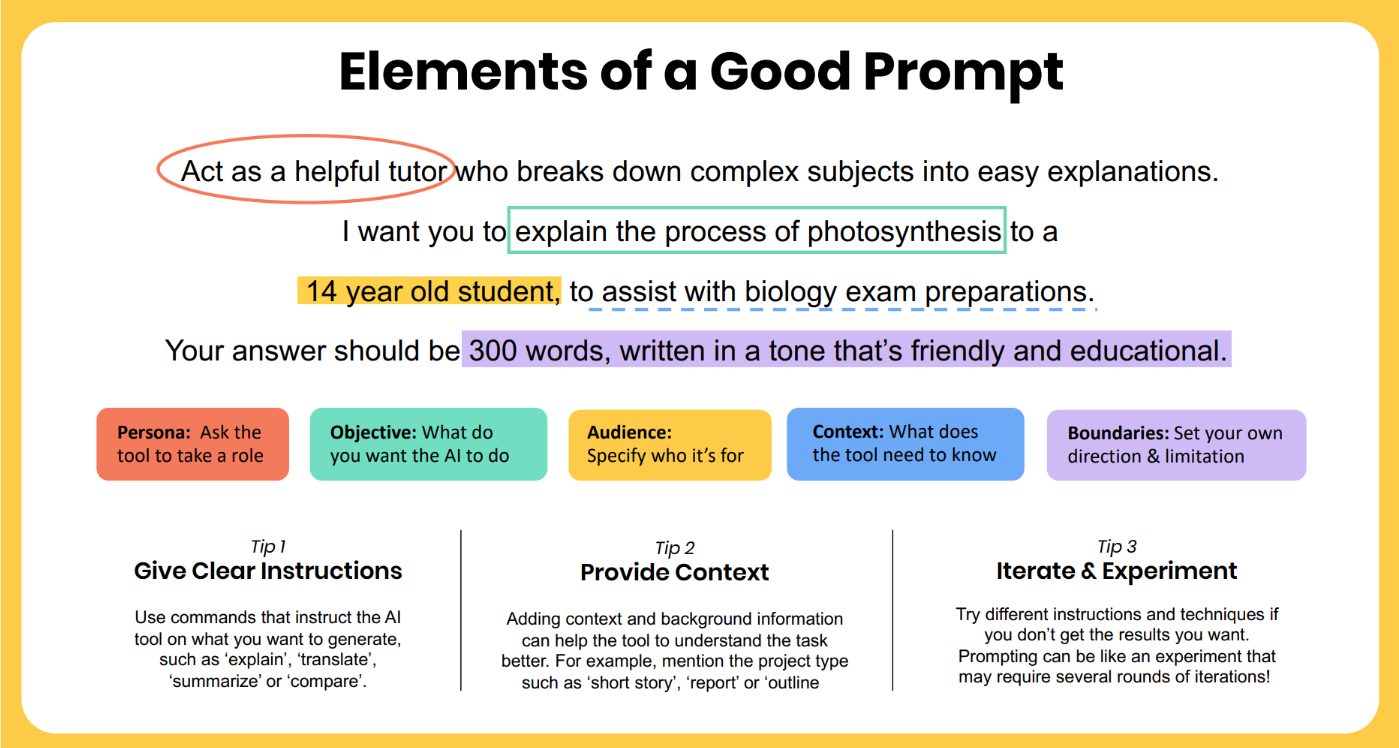

## 2.2 Usage of LLMs in Math

*   <font color='blue'>**Question (for discussion):**</font> How can LLMs help us in mathematics?



Here are some suggestions:

1. **Summarization**

We can use LLMs (with caution) to try to understand some parts of mathematical articles.

2. **Information Retrieval**

LLMs can serve as an alternative to platforms like StackExchange.

3.  **Code Generation and Text Transformation**

LLMs can translate mathematical proofs into formal languages like Lean, aiding in verification and error detection.

4. **Data Generation**

 LLMs can generate synthetic datasets by translating mathematical descriptions into executable Python code.


Don't forget: <font color='red'>**LLMs are prone to hallucinations. Always critically evaluate their output**.</font>

